In [24]:
import seaborn as sns
# set font-scale
sns.set(style="whitegrid", context="notebook",font_scale=1.2)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [25]:
def load_csvs_into_df(dir):
    dirs = [os.path.join(dir,d) for d in os.listdir(dir) if os.path.isdir(os.path.join(dir,d))]
    dfs = []
    for d in dirs:
        seeds = [f for f in os.listdir(os.path.join('./',d)) if f.startswith('seed')]
        for seed in seeds:
            results = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('test_results')][0]
            results_df = pd.read_csv(os.path.join(d, seed, results))
            dfs.append(results_df)
    df = pd.concat(dfs)
    return df

In [26]:
df = load_csvs_into_df('./')

In [27]:
# only keep relevant columns
df = df[['seed','effective_dataset_size','test/lungOpacity_young_subgroupAUROC','test/lungOpacity_old_subgroupAUROC','protected_attr_percent']]

In [28]:
df = pd.melt(df, id_vars=['seed','protected_attr_percent','effective_dataset_size'], value_vars=['test/lungOpacity_young_subgroupAUROC','test/lungOpacity_old_subgroupAUROC'])

In [29]:
# replace variable names
print(df.variable.unique())
df.variable = df.variable.str.replace('test/lungOpacity_young_subgroupAUROC','young')
df.variable = df.variable.str.replace('test/lungOpacity_old_subgroupAUROC','old')
df.head()

['test/lungOpacity_young_subgroupAUROC'
 'test/lungOpacity_old_subgroupAUROC']


,seed,protected_attr_percent,effective_dataset_size,variable,value
0,2,0.25,0.002,young,0.4624
1,1,0.25,0.002,young,0.4550
2,5,0.25,0.002,young,0.4584
3,3,0.25,0.002,young,0.4600
4,4,0.25,0.002,young,0.4570


In [30]:
# load effective_dataset_size 1 
df_1 = load_csvs_into_df('../2023-09-02 22:38:35-FAE-rsna-age-bs32-noDP')
df_1 = df_1[['seed','test/lungOpacity_young_subgroupAUROC','test/lungOpacity_old_subgroupAUROC','protected_attr_percent']]
df_1['effective_dataset_size'] = 1
df_1 = pd.melt(df_1, id_vars=['seed','protected_attr_percent','effective_dataset_size'], value_vars=['test/lungOpacity_young_subgroupAUROC','test/lungOpacity_old_subgroupAUROC'])
df_1 = df_1[df_1.protected_attr_percent.isin([0,0.25,0.5,0.75,1])]
print(df.variable.unique())
df_1.variable = df_1.variable.str.replace('test/lungOpacity_young_subgroupAUROC','young')
df_1.variable = df_1.variable.str.replace('test/lungOpacity_old_subgroupAUROC','old')
df_1.head()

['young' 'old']


,seed,protected_attr_percent,effective_dataset_size,variable,value
15,2,0.25,1,young,0.7622
16,1,0.25,1,young,0.7586
17,5,0.25,1,young,0.7648
18,3,0.25,1,young,0.7598
19,4,0.25,1,young,0.7716


In [31]:
# concat df and df_1
df = pd.concat([df,df_1])

In [32]:
# sort list ascending
fractions = df.protected_attr_percent.unique()
fractions.sort()

In [33]:
# sort df by effective_dataset_size
df = df.sort_values(by=['effective_dataset_size'])

In [34]:
sizes = df.effective_dataset_size.unique()

best_dss 4 0.01


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

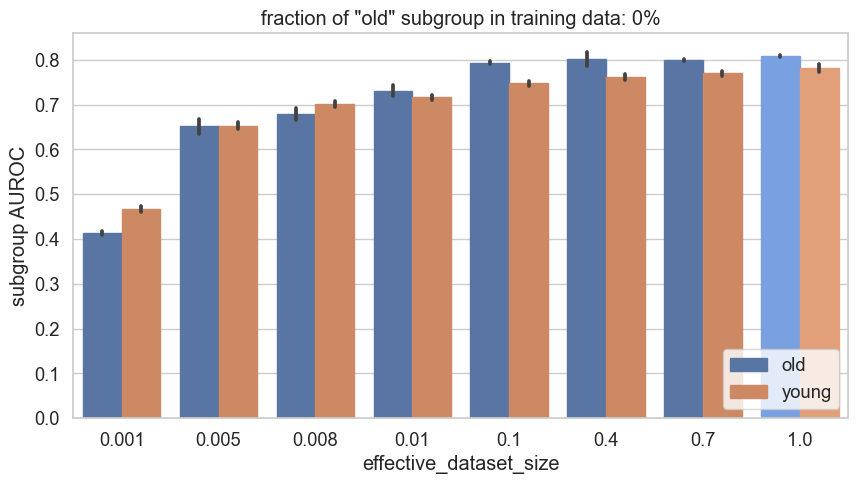

best_dss 4 0.01


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

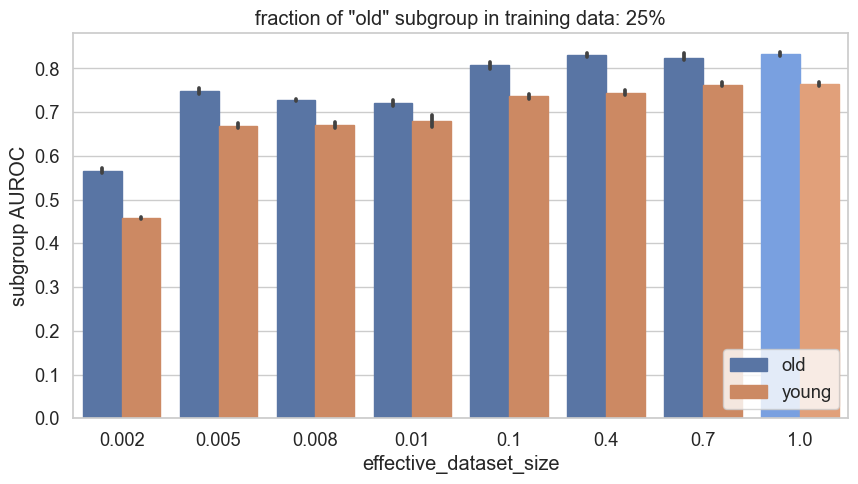

best_dss 0 0.001


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

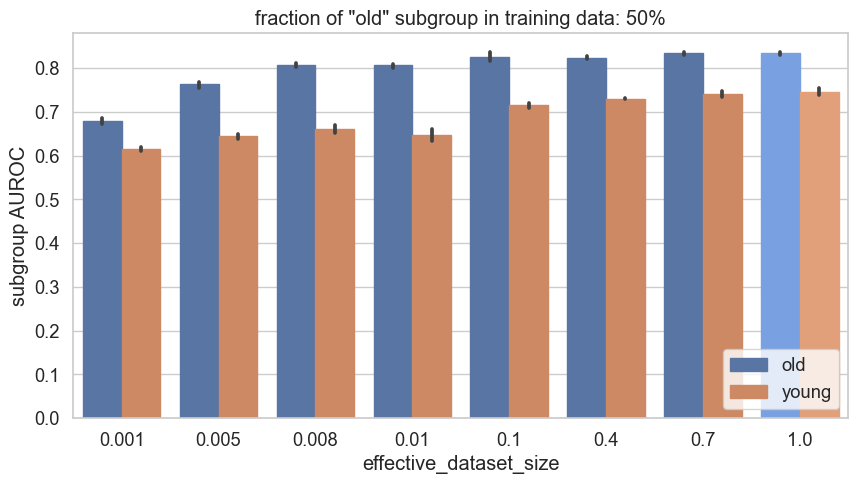

best_dss 2 0.005


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

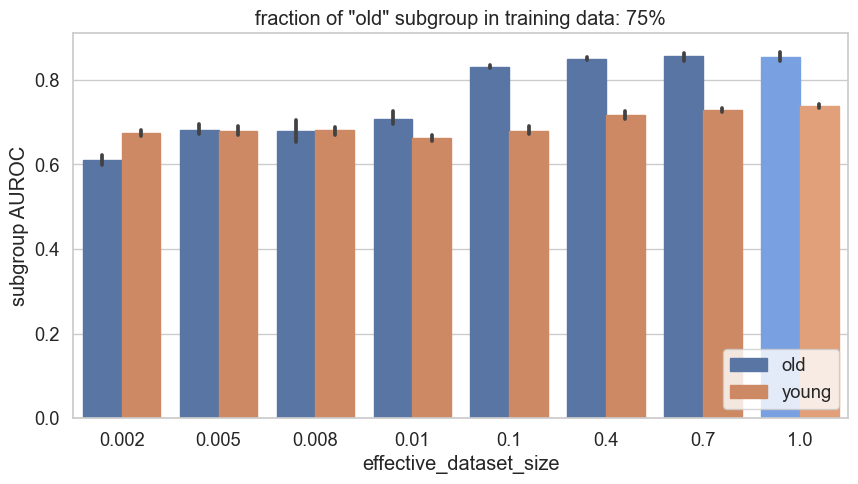

best_dss 2 0.005


/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

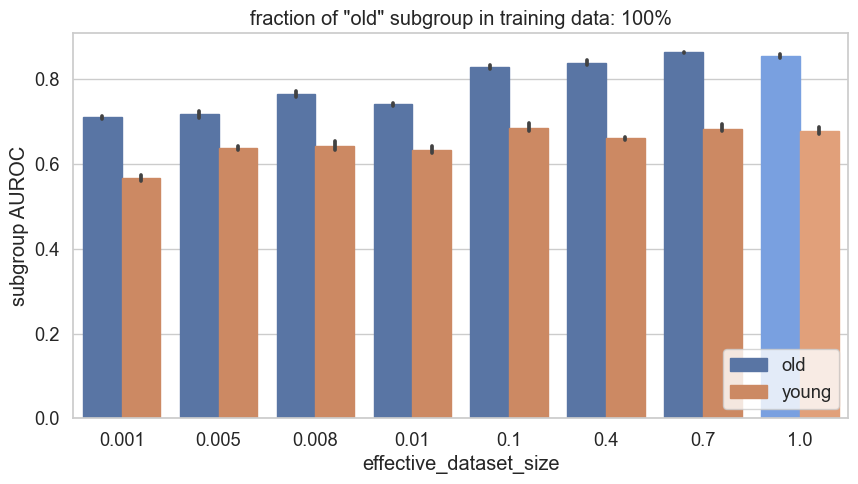

In [35]:
for f in fractions:
    plt.figure(figsize=(10,5))
    sub = df[df.protected_attr_percent==f]
    # over all weights get weight with minimum dist between young and old subgroup AUROC
    min_dist = np.inf
    best_dss = None
    best_dss_max = None
    best_dss_min = None
    for idx, w in enumerate(sizes):
        sub_grouped_w = sub[sub.effective_dataset_size==w]
        # compute dist between max and min of value column
        dist = sub_grouped_w.value.max() - sub_grouped_w.value.min()
        if dist < min_dist:
            min_dist = dist
            best_dss = idx
            best_dss_max = sub_grouped_w.value.max()
            best_dss_min = sub_grouped_w.value.min()
    print("best_dss", best_dss, sizes[best_dss])
    # sort sub by variable
    sub = sub.sort_values(by=['variable'])
    g = sns.barplot(data=sub, x="effective_dataset_size", y="value", hue="variable")
    # create vertical line at best weight
    #plt.plot([best_dss, best_dss], [best_dss_min, best_dss_max], color='red', linestyle='-', linewidth=3)
    # add text at same location
    custom_colors = ["#5975A4"]*7 + ["#79a0e0"] + ["#CC8963"]*7 + ["#e1a07a"]
    for i, bar in enumerate(g.patches):
        bar.set_color(custom_colors[i])
    #plt.text(best_dss * 1, 0.8, f'min. diff.', fontsize=12, color="red")
    plt.title(f'fraction of "old" subgroup in training data: {f*100:.0f}%')
    # set axis labels
    plt.xlabel('effective_dataset_size')
    plt.ylabel('subgroup AUROC')
    plt.legend(loc="lower right")
    plt.show()